In [1]:
import numpy as np

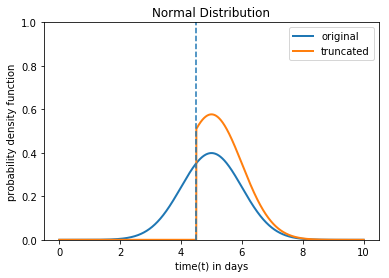

In [3]:
#plot normal distribution
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm,truncnorm

lower, upper = 4.5, 10
mu, sigma = 5, 1
X = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
N = stats.norm(loc=mu, scale=sigma)

#count, bins, ignored = plt.hist(X.rvs(10000), normed=True)
#count1, bins1, ignored1 = plt.hist(N.rvs(10000), normed=True)

a, b = (lower - mu) / sigma, (upper - mu) / sigma
x_range=np.linspace(0,10,10000)
plt.plot(x_range,norm.pdf(x_range, loc = mu, scale = sigma), linewidth=2, label='original')
plt.plot(x_range, truncnorm.pdf(x_range, a, b, loc = mu, scale = sigma), linewidth=2,label='truncated')
plt.axvline(x=lower, linestyle= "dashed")
plt.ylim(0,1)
plt.xlabel('time(t) in days')
plt.ylabel('probability density function')
plt.title ('Normal Distribution')
plt.legend()
plt.savefig("pic_1.png")
plt.show()


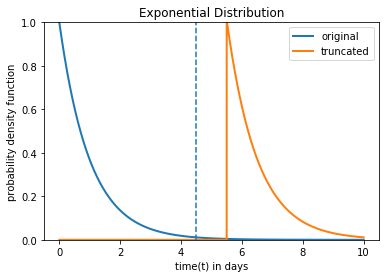

In [4]:
#plot exponential distribution
from scipy.stats import expon,truncexpon
x_range=np.linspace(0,10,10000)
# gamma=1
scale= 1
a,b = lower/scale, (upper-lower)/scale
plt.plot(x_range,expon.pdf(x_range, scale = 1),linewidth=2,label='original')
plt.plot(x_range,truncexpon.pdf(x_range,a, b,scale = 1),linewidth=2, label= 'truncated')
plt.axvline(x=lower, linestyle= "dashed")
plt.ylim(0,1)
plt.xlabel('time(t) in days')
plt.ylabel('probability density function')
plt.title ('Exponential Distribution')
plt.legend()
plt.savefig("pic_2.png")
plt.show()

In [5]:
#estimate remaining process time
import numpy as np
#number of samples drawn in each iteration
n_samples = 100000
#the lower and upper bounds for the trancated normal distribution where lower is current time t0
amin, amax = 4.5, 10
#number of simulations for montecarlo simulation(2n)
iterations=40
#list to store samples drawn in each iteration 
simulations=[]
while iterations>0:
    samples = np.zeros((0,))    # empty for now
    while samples.shape[0] < n_samples:
        #draw sample from normal distribution
        s = np.random.normal(5, 1, size=(n_samples,))
        #use rejection sampling here to see if it meets the contraints, i.e. t>t0
        accepted = s[(s >= amin) & (s <= amax)]
        samples = np.concatenate((samples, accepted), axis=0)
    samples = samples[:n_samples]
    simulations.append(samples)
    iterations = iterations-1
#take the mean of 2n iterations i.e. nth sample to calculate remaining time
sample=simulations[19]


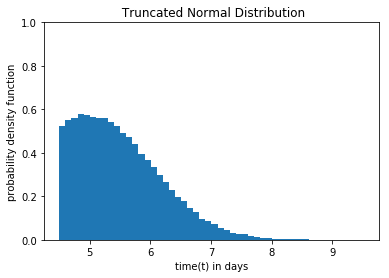

In [8]:
#plot truncated distribution to deduce remaining time
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.hist(samples, bins=50, density=True)
plt.ylim(0,1)
plt.xlabel('time(t) in days')
plt.ylabel('probability density function')
plt.title (' Truncated Normal Distribution')
plt.savefig("pic_.png")
plt.show()

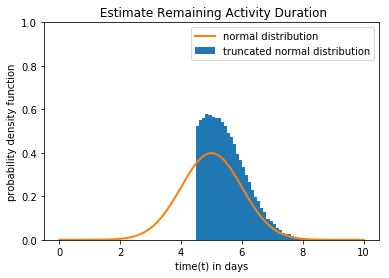

In [9]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm,truncnorm
mu,sigma=5,1
x_range=np.linspace(0,10,10000)
plt.hist(samples, bins=50, density=True,label='truncated normal distribution')
plt.plot(x_range,norm.pdf(x_range, loc = mu, scale = sigma), linewidth=2, label='normal distribution')
plt.ylim(0,1)
plt.xlabel('time(t) in days')
plt.ylabel('probability density function')
plt.title (' Estimate Remaining Activity Duration')
plt.legend()
plt.savefig("pic_4.png")
plt.show()